***
In this notebook i will be explaining about exploratory data analysis on text data
<br>
I will be using the Amazon fine food reviews dataset from Kaggle(https://www.kaggle.com/snap/amazon-fine-food-reviews)
<br>
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('C:\\AmazonReviews\\Reviews.csv')

In [3]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(568454, 10)
True
(568411, 10)


In [4]:
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(393661, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


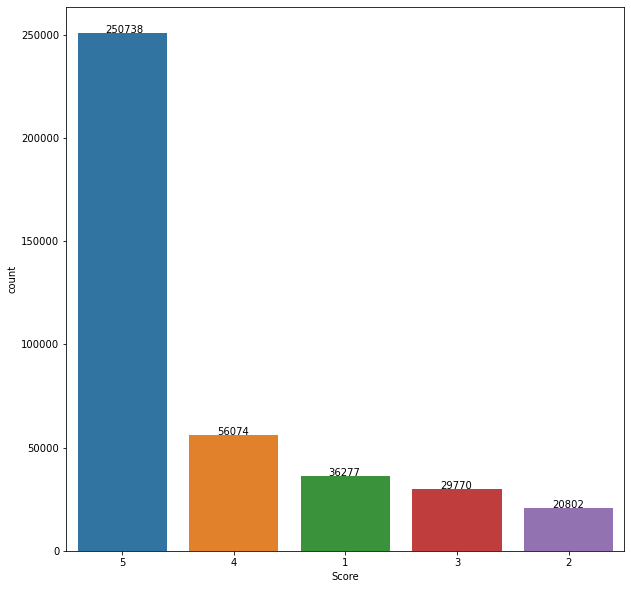

In [5]:

plt.figure(figsize=(10,10))

ax = sns.countplot(x=df["Score"],  data=df, order = df["Score"].value_counts().index )
for p, label in zip(ax.patches, df["Score"].value_counts()):
    #print(p)
    #print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))



In [6]:
df.groupby('ProductId').count()

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
141278509X,1,1,1,1,1,1,1,1,1
2734888454,2,2,2,2,2,2,2,2,2
2841233731,1,1,1,1,1,1,1,1,1
7800648702,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
B009SF0TN6,1,1,1,1,1,1,1,1,1
B009SR4OQ2,1,1,1,1,1,1,1,1,1
B009UOFU20,1,1,1,1,1,1,1,1,1


Let is filter those products which have atleast 400 reviews 

In [7]:
df_products = df.groupby('ProductId').filter(lambda x: len(x) >= 400)
df_product_groups = df_products.groupby('ProductId')

In [8]:
print(len(df_products))
print(len(df_product_groups))


12034
23


Let us plot the reviews 

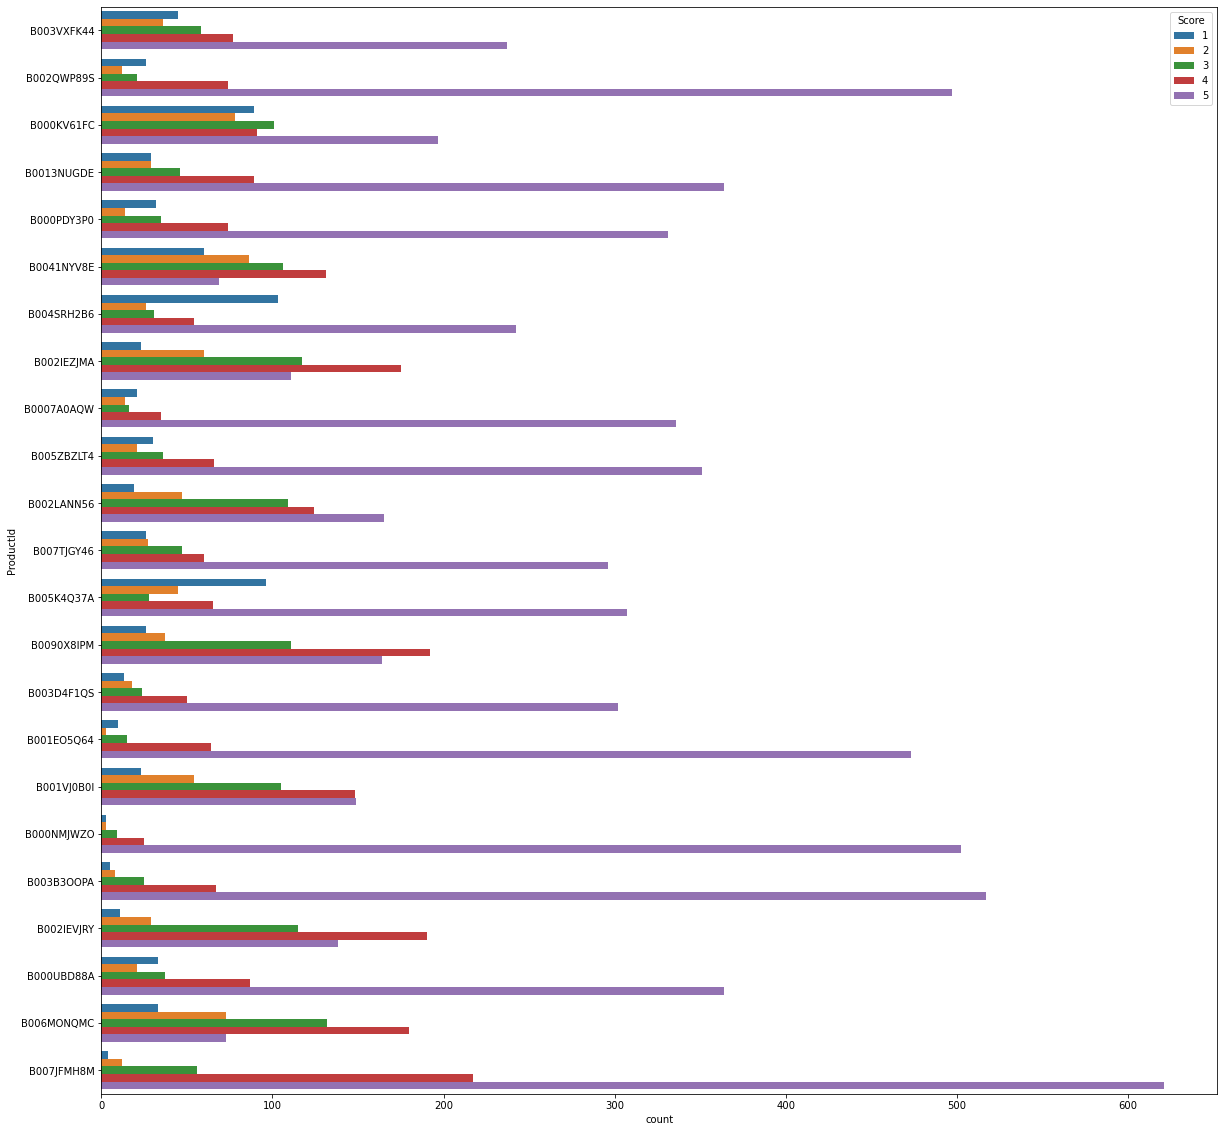

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(y="ProductId",  hue="Score", data=df_products);

Let us filter by User's who have more than 100 reviews

In [52]:
df.groupby('UserId').count()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
UserId,,,,,,,,,
#oc-R103C0QSV1DF5E,1,1,1,1,1,1,1,1,1
#oc-R109MU5OBBZ59U,1,1,1,1,1,1,1,1,1
#oc-R10LFEMQEW6QGZ,1,1,1,1,1,1,1,1,1
#oc-R10LT57ZGIB140,1,1,1,1,1,1,1,1,1
#oc-R10UA029WVWIUI,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
AZZV9PDNMCOZW,3,3,3,3,3,3,3,3,3
AZZVNIMTTMJH6,1,1,1,1,1,1,1,1,1
AZZY649VYAHQS,1,1,1,1,1,1,1,1,1


In [56]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 10)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

2555


In [57]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 5)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

8330


In [58]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 2)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

50382


In [59]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 50)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

111


In [65]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 100)
df_userGroup = df_users.groupby('UserId')
print("Number of Users:"+ str(len(df_userGroup)))
df_products = df_users.groupby('ProductId')
print("Number of products:"+ str(len(df_products)))

Number of Users:18
Number of products:2507


<AxesSubplot:xlabel='count', ylabel='UserId'>

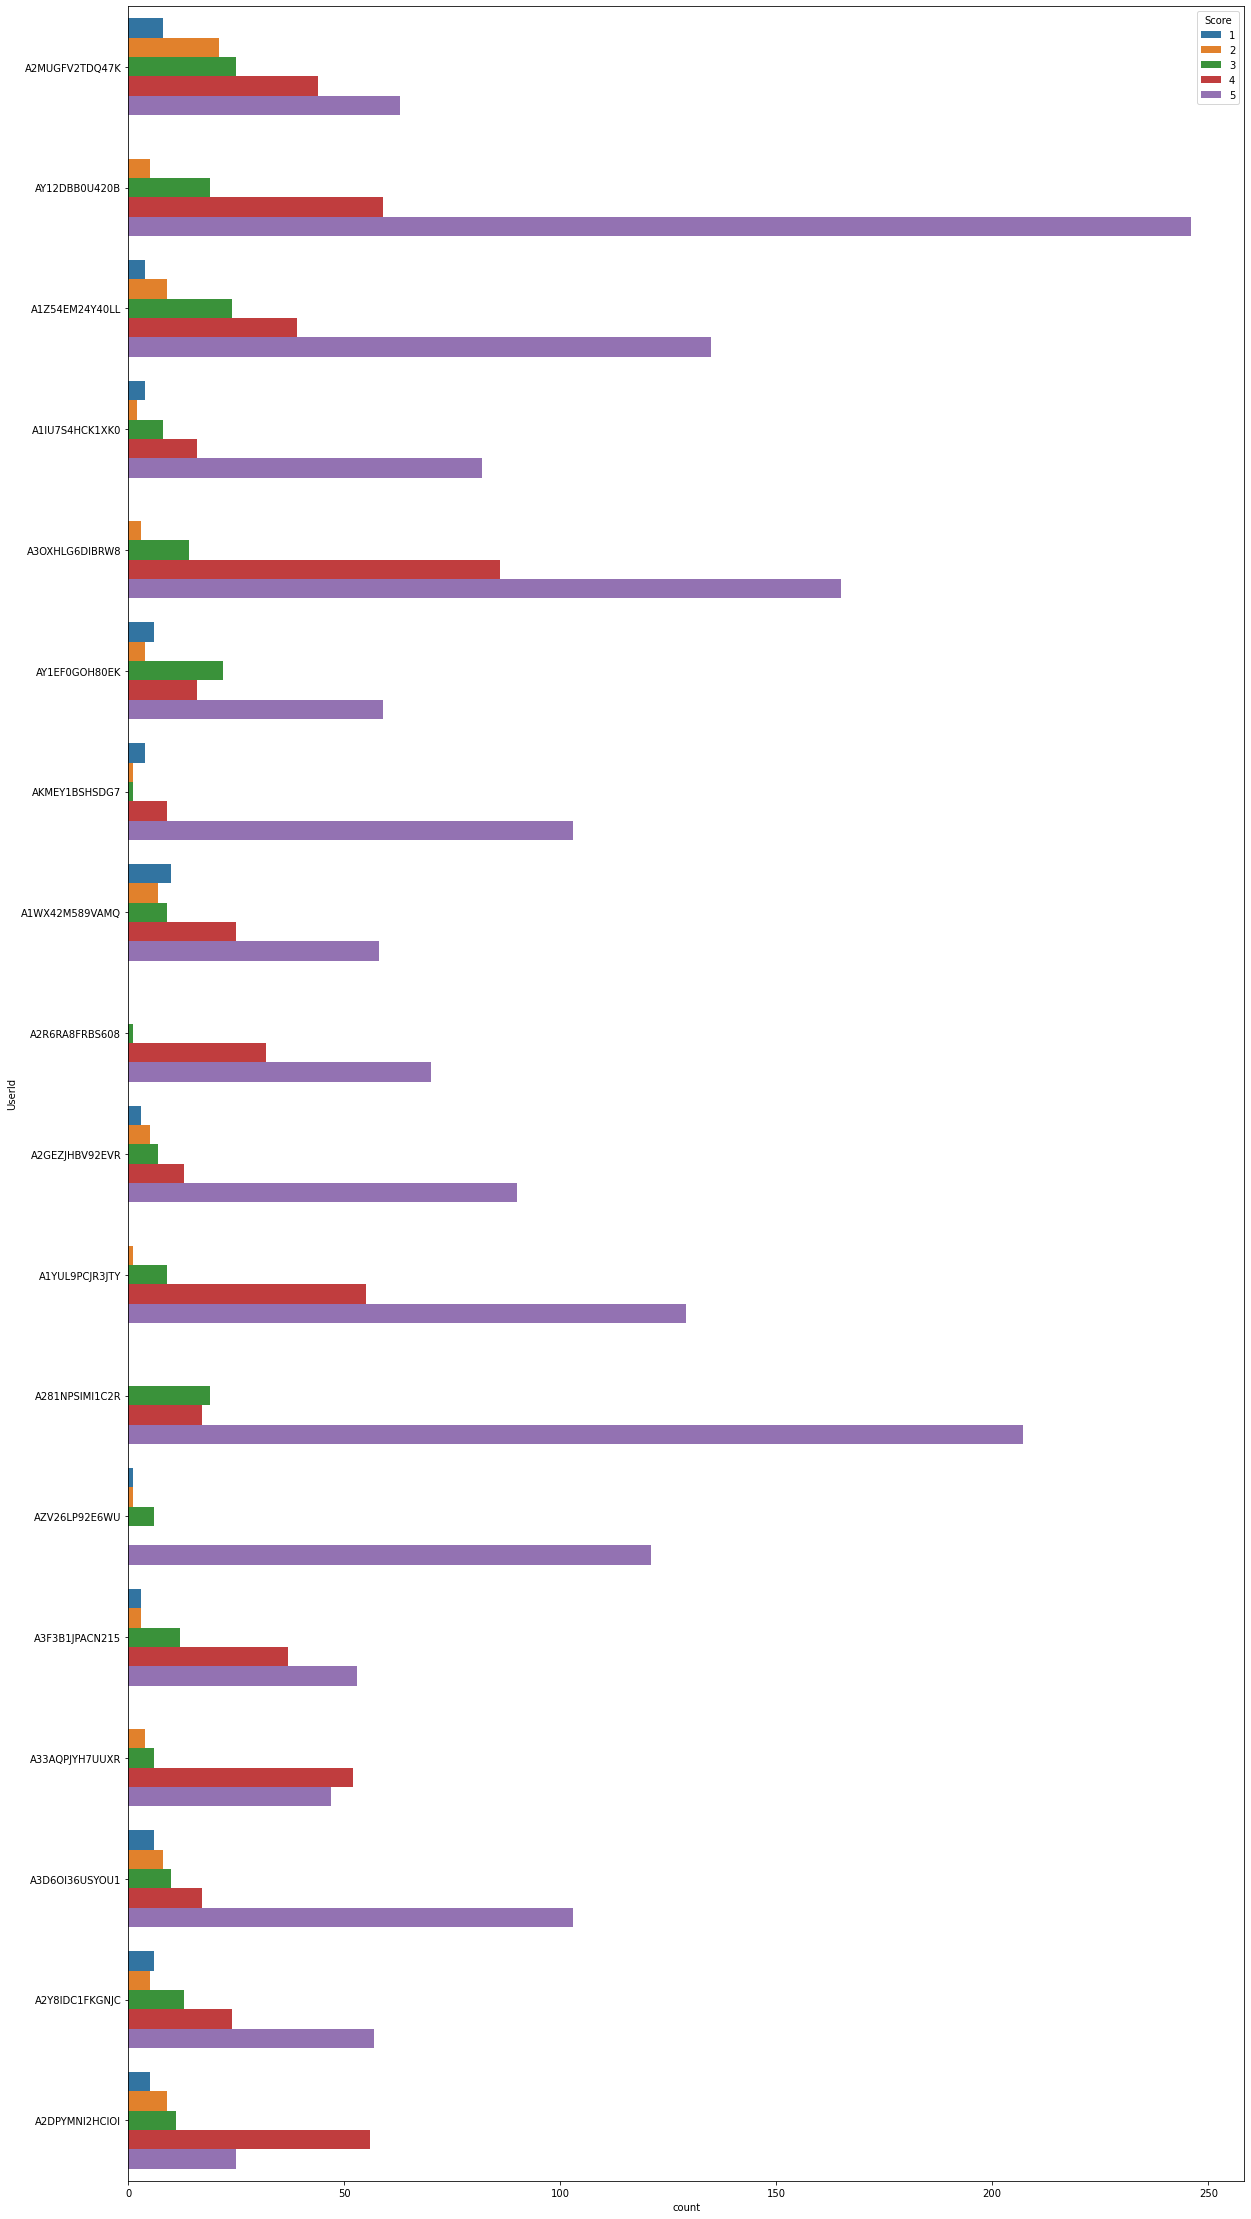

In [63]:
plt.figure(figsize=(20,40))
sns.countplot(y="UserId", hue="Score", data=df_users )

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 


In [12]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()



In [13]:
mask = (df["Score"] == 1) | (df["Score"] == 2)
df_rating12 = df[mask]
mask = (df["Score"]==4) | (df["Score"]==5) | (df["Score"]==3)
df_rating345 = df[mask]



In [14]:
print(len(df_rating12))
print(len(df_rating345))


57079
336582


In [15]:
df_rating12['Text'] = df_rating12['Text'].apply(clean_text)
df_rating12['Text'] = df_rating12['Text'].apply(remove_Stopwords)
df_rating12['Text'] = df_rating12['Text'].apply(lemmatize_text)


df_rating345['Text'] = df_rating345['Text'].apply(clean_text)
df_rating345['Text'] = df_rating345['Text'].apply(remove_Stopwords)
df_rating345['Text'] = df_rating345['Text'].apply(lemmatize_text)


d:\spacy\sp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\spacy\sp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\spacy\sp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [16]:
df_rating12['Num_words_text'] = df_rating12['Text'].apply(lambda x:len(str(x).split())) 
df_rating345['Num_words_text'] = df_rating345['Text'].apply(lambda x:len(str(x).split())) 


d:\spacy\sp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\spacy\sp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df_rating12['Num_words_text'].describe()

count    57079.000000
mean        43.776222
std         42.088128
min          1.000000
25%         19.000000
50%         32.000000
75%         53.000000
max       1156.000000
Name: Num_words_text, dtype: float64

In [18]:
df_rating345['Num_words_text'].describe()

count    336582.000000
mean         40.795848
std          41.367516
min           1.000000
25%          17.000000
50%          28.000000
75%          49.000000
max        1975.000000
Name: Num_words_text, dtype: float64

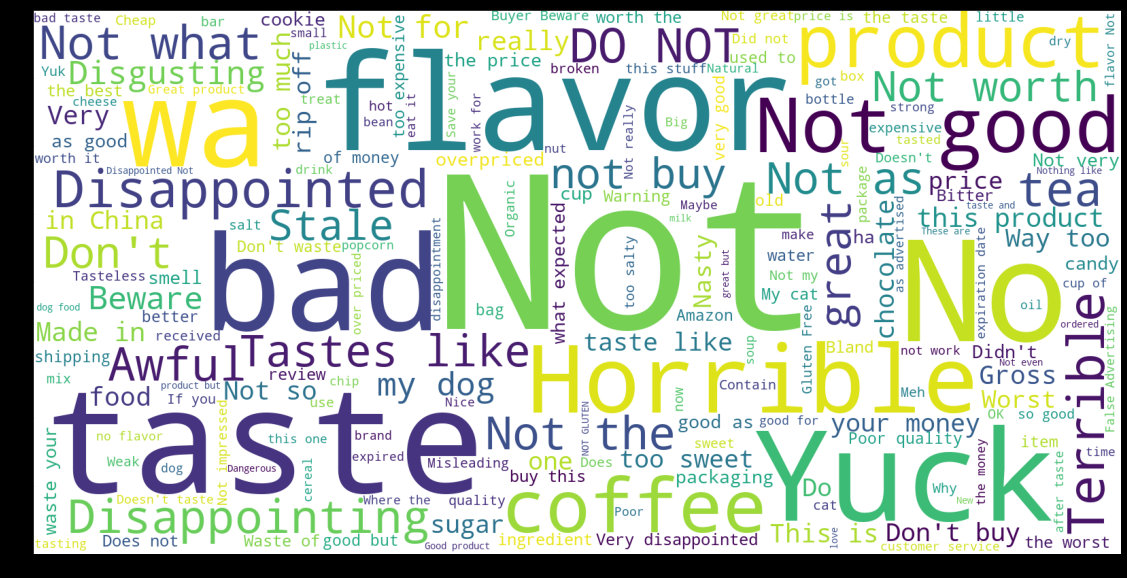

In [21]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating12['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
 

(-0.5, 1599.5, 799.5, -0.5)

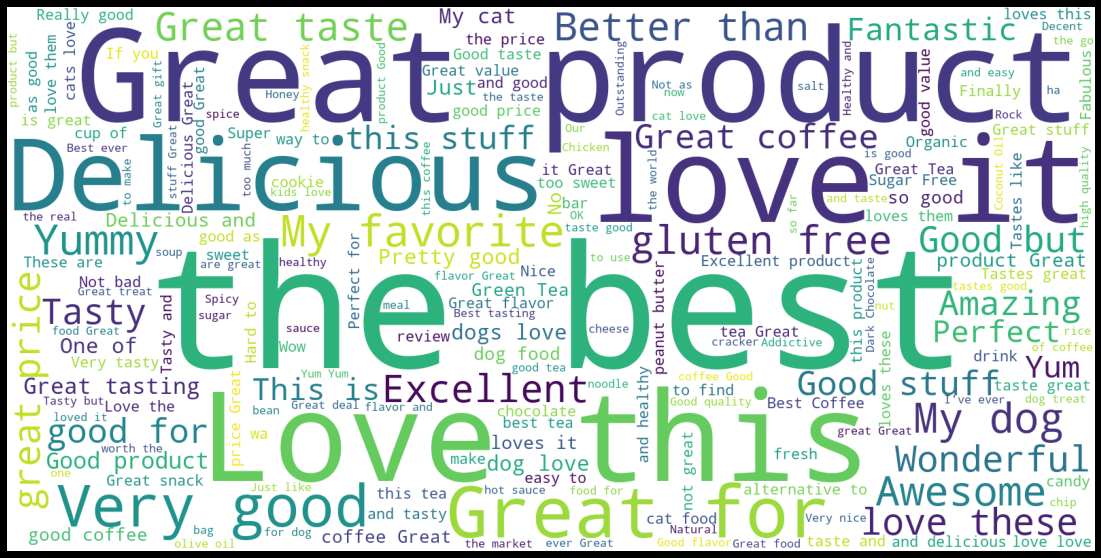

In [22]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating345['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")